<a href="https://colab.research.google.com/github/vedantdave77/Project-Instkart_Market_Explotary-Analysis-and-LGB-ML-Modleing/blob/master/Instacart_Exploratory_Analysis_%26_Prediction_(LGB_ML_Algo_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Remove any kind of warning for trial...error 
pd.options.mode.chained_assignment = None # by default value = 'warn'/'arise'


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Find out the total files in datasets

In [0]:
from subprocess import check_output
print(check_output(['ls', '/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis']).decode('utf8'))


aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



## Data Understanding

In [0]:
Aisles = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/aisles.csv')
Departments = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/departments.csv')
Product_order_prior = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/order_products__prior.csv')
Product_order_train =pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/order_products__train.csv')
Orders = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/orders.csv')
Products = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/products.csv')

In [0]:
Aisles.head(2)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


In [0]:
Departments.head(2)

,department_id,department
0,1,frozen
1,2,other


In [0]:
Product_order_prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [0]:
Product_order_train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [0]:
print(Product_order_prior.size)
print(Product_order_train.size)

129737956
5538468


In [0]:
Orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
Products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [0]:
print('Orders')
print(Orders.info())
print('')
print('products')
print(Products.info())
print('')
print('Aisles')
print(Aisles.info())
print('')
print('Product_order_prior')
print(Product_order_prior.info())
print('')
print('Product_order_train')
print(Product_order_train.info())
print('')
print('Departments')
print(Departments.info())

Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None

products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

Aisles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

Product_order_prior
<class '

## Observation: 
### All the data are either inobject form of in int64 form so no conflict between data, Moreover there are no missing values (Total entries match with non-null values.) So,Number of  Missing Values are ZERO.

### Other, intutuion is about order's eval_set, it contains info about prior and train release the information regarding total items in the orders. So, One orders may contain more items. By analysis we can get that info. 

* Secondly, from above Order[items] == prior + train dataset entries (if all data are filled)


[3214874, 131209, 75000]


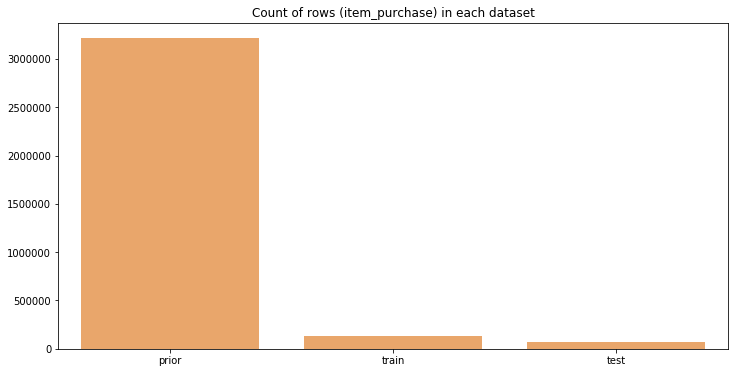

In [0]:
# First we get the total raws in all sets
color = sns.color_palette()
count_rows = Orders.eval_set.value_counts()

count_rows_label = list(count_rows)
print(count_rows_label)

plt.figure(figsize=(12,6))
g = sns.barplot(count_rows.index, count_rows.values, tick_label = count_rows,alpha = 0.7,color = color[1])
plt.xlabel=('Eval set type')
plt.ylabel=('Number of Entries')
plt.title('Count of rows (item_purchase) in each dataset')
plt.show()


### Oh! So order also has test dataset values,so, now our data are divided between prior purchase, trainset and testset for model reliability checking.

In [0]:
count_entries = Orders.groupby('eval_set')['user_id'].nunique()
count_entries

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

#### Here, total customers are 206,209 and last purchases are 131,209 are given as train set and we need to predict for other 75,000 customer

Now , let's count (Users per no. of order)

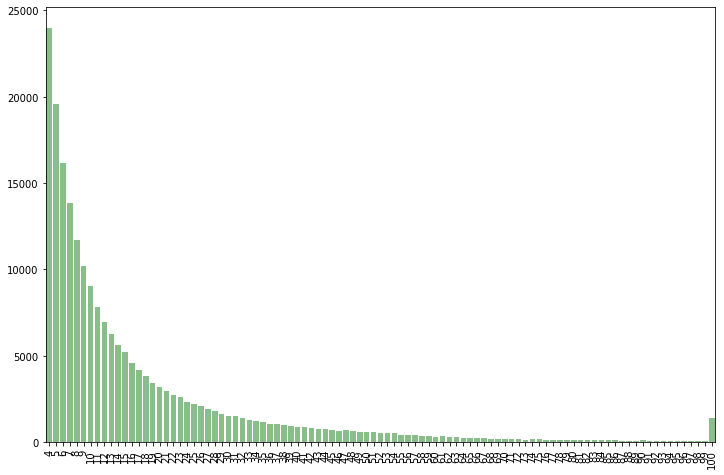

In [0]:
max_ord = Orders.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
max_ord = max_ord.order_number.value_counts()

plt.figure(figsize= (12,8))
sns.barplot(max_ord.index, max_ord.values,alpha = 0.6, color = color[2]) 
plt.xlabel = ('Max order number')
plt.ylabel = ('Number of Occurance')
plt.xticks(rotation = 'vertical')
plt.show()


#### So, there are no user order less than4 items and no one ordered more than 100 items 

Let's findout week day purchase patterns

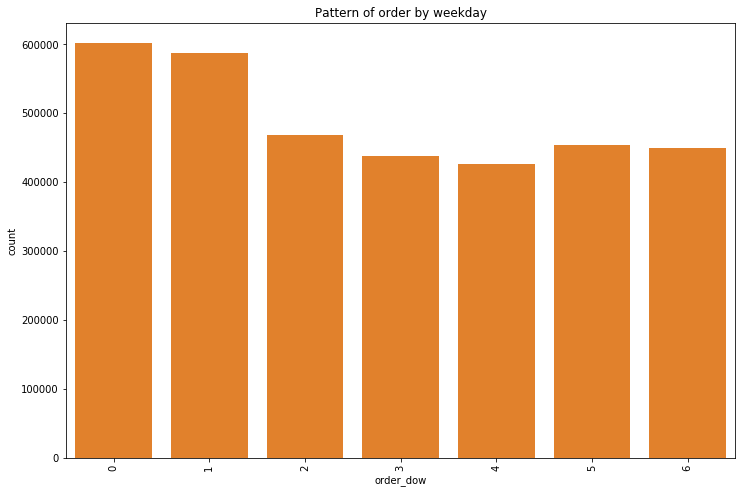

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'order_dow',data =Orders, color = color[1])
plt.xlabel=('Day of week')
plt.ylabel=('Count')
plt.xticks(rotation = 'vertical')
plt.title('Pattern of order by weekday')
plt.show()

Weeks are start from saturday so saturday and sunday have more orders, whereas Wednesday has least orders.

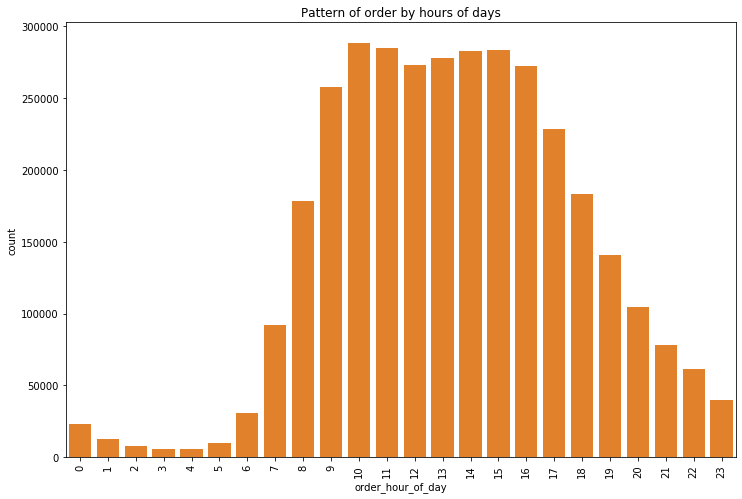

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'order_hour_of_day',data =Orders, color = color[1])
plt.xlabel=('Hours of day')
plt.ylabel=('Count')
plt.xticks(rotation = 'vertical')
plt.title('Pattern of order by hours of days')
plt.show()

#### There are more purchase on daytime than night time.

Now, let's combine both data and get idea about best order time among the weekdays

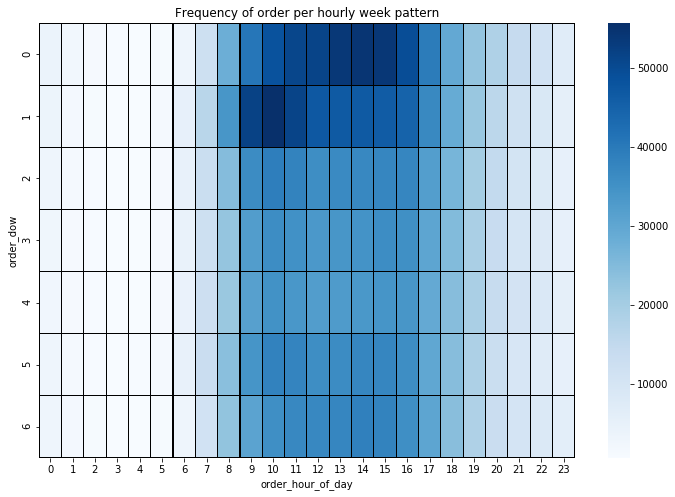

In [0]:
Week_hourly_pattern  = Orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()

Week_hourly_pattern = Week_hourly_pattern.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,8))
sns.heatmap(Week_hourly_pattern,linecolor = 'black', square = False,linewidths = 0.1,xticklabels= 'auto',cmap = 'Blues')
plt.title('Frequency of order per hourly week pattern')
plt.show()

High intensity of blue color give best purchase capacity

### Until now we get the information about the training set, for whole pattern now we must mine the prior data by columdn name days_since_prior_data.


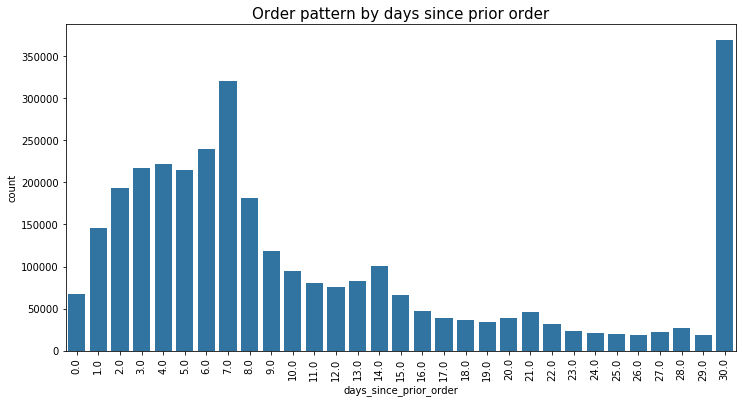

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(x="days_since_prior_order", data= Orders, color=color[0])
plt.ylabel=('Count')
plt.xlabel=('Days since prior order')
plt.xticks(rotation='vertical')
plt.title("Order pattern by days since prior order", fontsize=15)
plt.show()

#### This revels the information of customer to order again after order once. So for example 7 is high than other shows that there are more customer who order weekly. And a large amount of customer order once in a month (high peak at 30)

Now, lets count percentage of this pattern for ease understanding

In [0]:
# percentage of re-ordering pattern is given by ...
print(Product_order_prior.reordered.sum()/Product_order_prior.shape[0] * 100,'%')

58.969746679221615 %


In [0]:
# same pattern in train dataset
print(Product_order_train.reordered.sum()/Product_order_train.shape[0]*100,'%')

59.859441275096295 %


Some products may be not reorder, so in business we must check issue regarding that for future consequences of product issue so let's find such product.

### This topic is quiet confusing and it may meshup with 59 % reordered to 41% not-reorder intution (wrong), 
### *But, reality is our data in order_prior are with respect to each product id, so with one order id there are more rows so first we must calculate them with order_id sum and groupby method and then we can find out reality of order_id which have not even single product reorder situation.*

In [0]:
Product_order_prior.head(10)
# see 2 order_id have 9 products and 6 are reordered


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [0]:
grouped_df = Product_order_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
test = grouped_df[grouped_df['reordered'] >1]
test.head(5)
# see 4 have zero

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
7,9,10


In [0]:
order_once = Product_order_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
order_once["reordered"].loc[order_once["reordered"]>1] = 1
order_once.reordered.value_counts() / order_once.shape[0]*100


1    87.915141
0    12.084859
Name: reordered, dtype: float64

Now check same condition in trainset

In [0]:
order_once_t = Product_order_train.groupby("order_id")["reordered"].aggregate("sum").reset_index()
order_once_t["reordered"].loc[order_once_t["reordered"]>1] = 1
print(order_once_t.reordered.value_counts() / order_once_t.shape[0] *100,'%')

1    93.444047
0     6.555953
Name: reordered, dtype: float64 %


### Observation:
#### 12% order of the prior set has no reorder and in train it is 6.5 

#### As we observe in each product there are more than one product is purchased so let's find out such *No of product bought in each order and No of such occurance*

In [0]:
Product_order_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


*DATA UNDERSTANDING:

Here, we will take the max agrregation because our data set gives value by adding order so if I add 1 on monday and 2 on tuesday so my status will update and 2 for wednesday so we must conside only last updation status which is max of all. (SEE EX. 2 with status 9 at the END)

TypeError: ignored

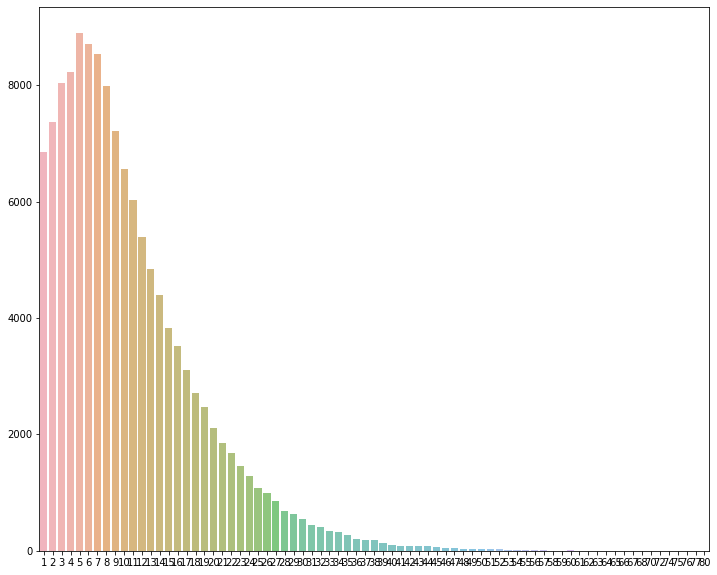

In [0]:
# ppoo = Product_per_order_occurance
ppoo = Product_order_train.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
ppoo = ppoo.add_to_cart_order.value_counts()


plt.figure(figsize=(12,10))
g = sns.barplot(ppoo.index, ppoo.values, alpha=0.7)

#ppoo = list(ppoo)
for index, values in ppoo:
    g.text(ppoo.index,ppoo.values, ppoo, color='black', ha="center")

plt.ylabel=('Number of Occurrences happened')
plt.xlabel=('Number of products in the given particular order')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
ppoo.head(10)

5     8895
6     8708
7     8541
4     8218
3     8033
8     7983
2     7368
9     7217
1     6845
10    6553
Name: add_to_cart_order, dtype: int64

### For other three dataset let's merge them in prior detail,because individual set can not give any useful information due to instore (order handling, *for employee conveniency*) information.

In [0]:
Product_order_prior = pd.merge(Product_order_prior,Products,on= 'product_id', how = 'left')
Product_order_prior = pd.merge(Product_order_prior,Aisles,on='aisle_id',how='left')
Product_order_prior = pd.merge(Product_order_prior,Departments,on='department_id',how='left')
Product_order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


COUNT:  No. of times the product order in total duration

In [0]:
Total_Product_order_count = Product_order_prior['product_name'].value_counts().reset_index()
Total_Product_order_count.columns = ['product_name','No_of_Order_Counts']
Total_Product_order_count.head(15)

,product_name,No_of_Order_Counts
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Yoo! people like organic products... 

#### In Storage house, Instacart company must use their most money, and attention to important aisle, so let find out such ailse for furthur insights

In [0]:
imp_aisle = Product_order_prior['aisle'].value_counts().reset_index()
imp_aisle.columns = ['Aisle_name','Usefulness_counts']
imp_aisle.head()

,Aisle_name,Usefulness_counts
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763


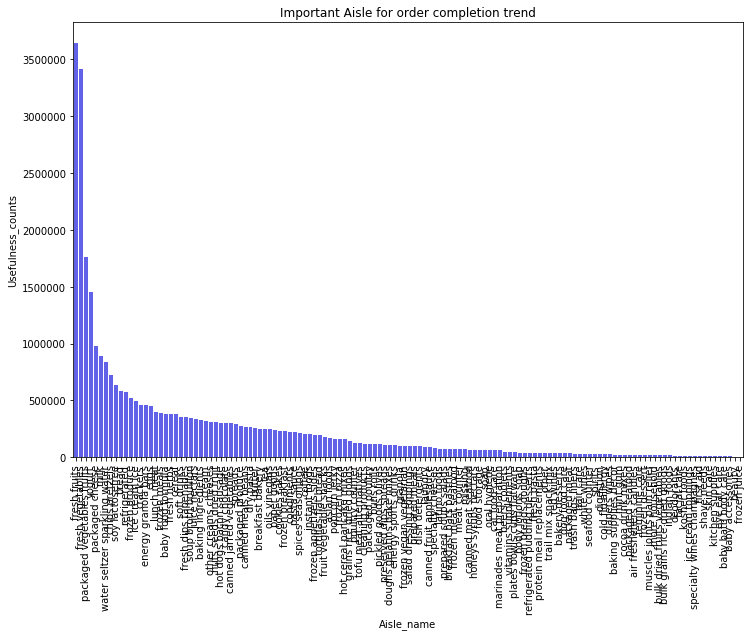

In [0]:
plt.figure(figsize=(12,8))
sns.barplot(imp_aisle.Aisle_name,imp_aisle.Usefulness_counts, alpha= 0.7, color= 'blue')
plt.xlabel = ('Aisle')
plt.ylabel = ('Counts for requirement during order fulfillment')
plt.title('Important Aisle for order completion trend')
plt.xticks(rotation= 'vertical')
plt.show()

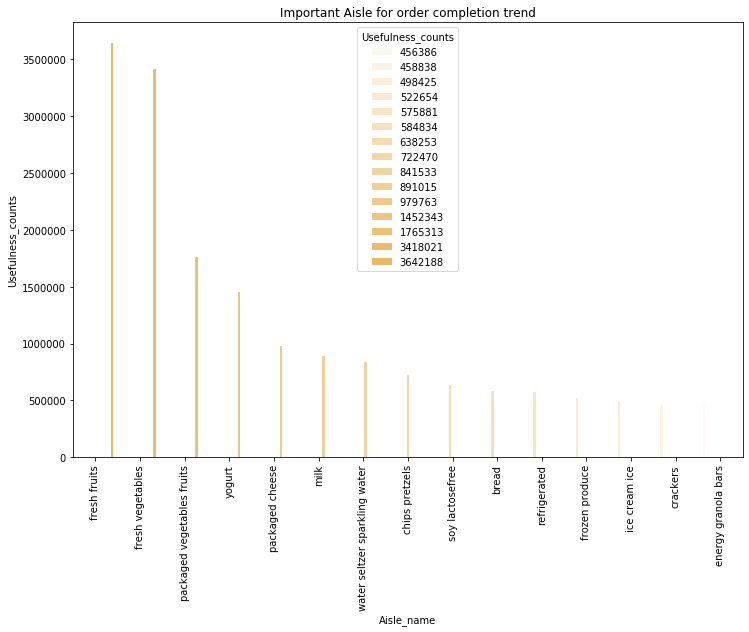

In [0]:
plt.figure(figsize= (12,8))
y = imp_aisle.head(15).Usefulness_counts
sns.barplot(x=imp_aisle.head(15).Aisle_name,y= imp_aisle.head(15).Usefulness_counts, alpha= 0.7, color= 'orange',hue = y )
plt.xlabel = ('Aisle')
plt.ylabel = ('Counts for requirement during order fulfillment')
plt.title('Important Aisle for order completion trend')
plt.xticks(rotation= 'vertical')
plt.show()

Some time, when company need to distributing budget or human resources, It must require to understand the distribution of dapartmentwise contribution in total orders. It also helpful for getting the idea about quality inspection, workload, shedule management and training program arrangements.

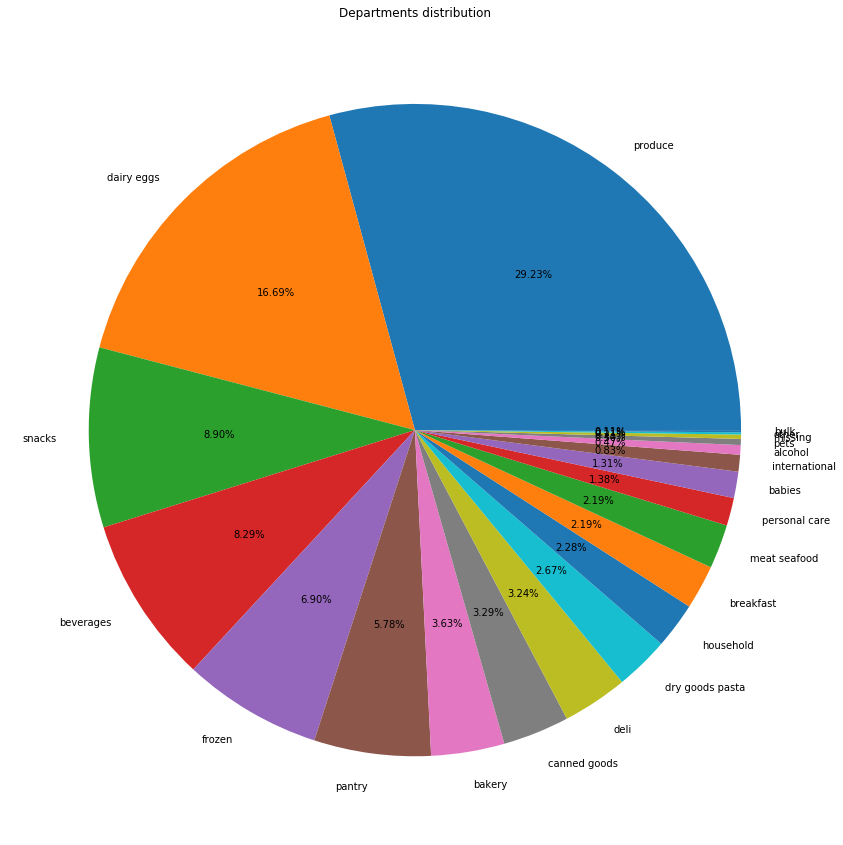

In [0]:
plt.figure(figsize=(15,15))
imp_dept = Product_order_prior['department'].value_counts()
labels = (np.array(imp_dept.index))
sizes = (np.array((imp_dept / imp_dept.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0)
plt.title("Departments distribution")
plt.show()

Now, another stack problem is about the departmentwise reordered ration.

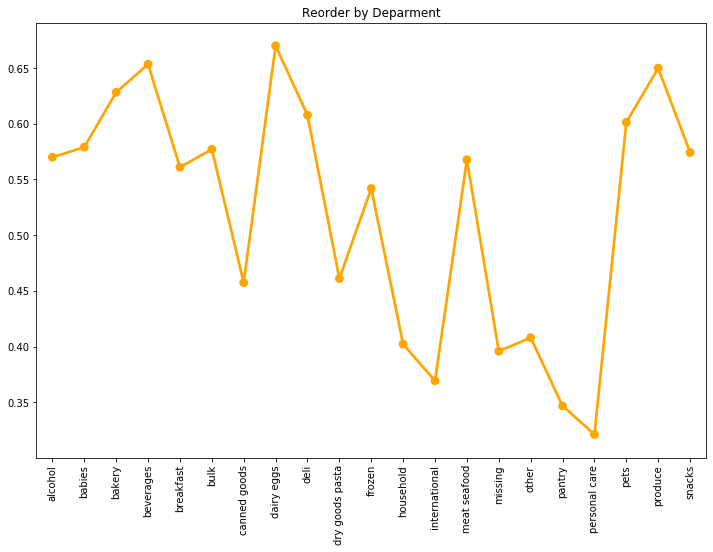

In [0]:
Reorder_dept = Product_order_prior.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8),frameon = True)
sns.pointplot(Reorder_dept['department'].values, Reorder_dept['reordered'].values,alpha = 0.75, color = 'orange')

plt.ylabel = ('Reorder Ratio')
plt.xlabel = ('Department_Name')
plt.title('Reorder by Deparment')
plt.xticks(rotation= 'vertical')
plt.show()

In [0]:
# Convert series to Dataframe for mergeing two observations
imp_dept = pd.DataFrame({'department':imp_dept.index, 'No of item ordered': imp_dept.values})
imp_dept.head()

,department,No of item ordered
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432


In [0]:
Big_Picture= pd.merge(imp_dept, Reorder_dept,how='left',on='department')
Big_Picture.head()
Big_Picture['eff_value'] = Big_Picture['No of item ordered'] * Big_Picture['reordered']
Big_Picture.head()

,department,No of item ordered,reordered,eff_value
0,produce,9479291,0.649913,6160710.0
1,dairy eggs,5414016,0.669969,3627221.0
2,snacks,2887550,0.574180,1657973.0
3,beverages,2690129,0.653460,1757892.0
4,frozen,2236432,0.541885,1211890.0


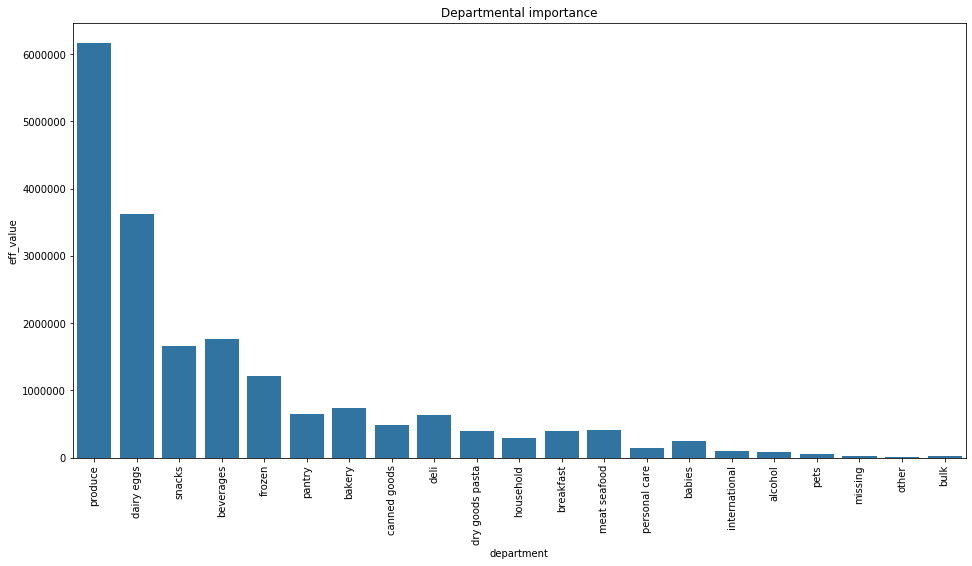

In [0]:
plt.figure(figsize= (16,8))
sns.barplot(x = 'department',y = 'eff_value',data = Big_Picture, color = color[0])
plt.xlabel = ('Department')
plt.xticks(rotation = 'vertical')
plt.ylabel = ('Real contribution of department')
plt.title('Departmental importance')
plt.show()

Now we will see the aisle- reorder ratio

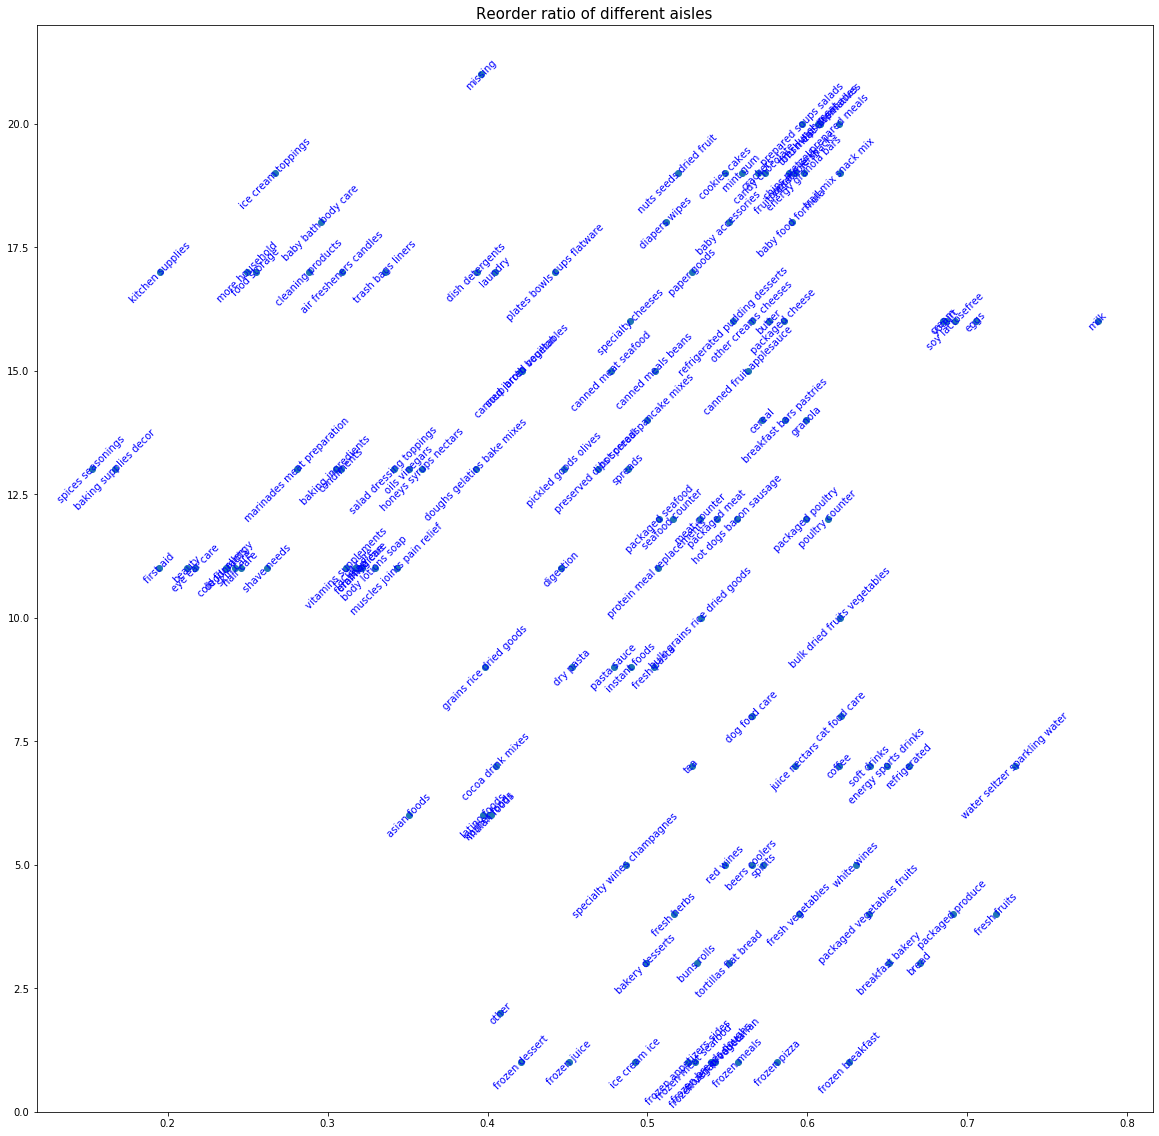

In [0]:
Reorder_Aisles = Product_order_prior.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(Reorder_Aisles.reordered.values, Reorder_Aisles.department_id.values)
for i, txt in enumerate(Reorder_Aisles.aisle.values):
    ax.annotate(txt, (Reorder_Aisles.reordered.values[i], Reorder_Aisles.department_id.values[i]), rotation=45, ha='center', va='center', color='blue',fontsize =10)
plt.xlabel=('Reorder Ratio')
plt.ylabel=('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

Now, we will find customer approach after adding item to cart 
##### (add to cart ----> ordered)

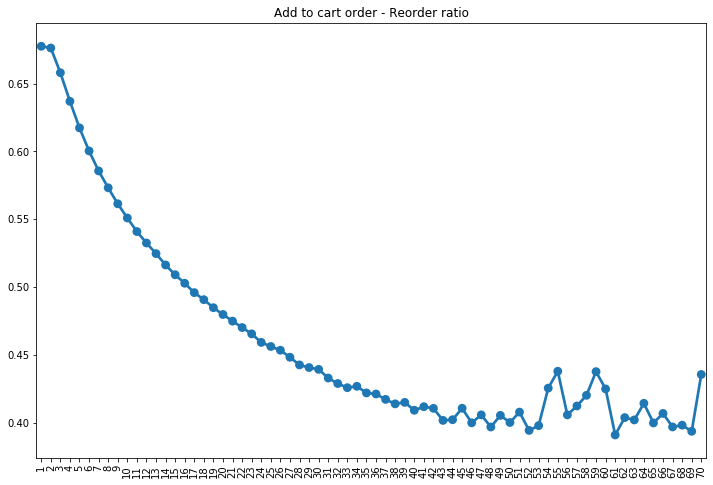

In [0]:
Product_order_prior['order_from_add_to_cart'] = Product_order_prior['add_to_cart_order'].copy()
Product_order_prior['order_from_add_to_cart'].loc[Product_order_prior['order_from_add_to_cart']>70 ]=70
conversion_cart_to_order = Product_order_prior.groupby(['order_from_add_to_cart'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize= (12,8))
sns.pointplot(conversion_cart_to_order['order_from_add_to_cart'].values,conversion_cart_to_order['reordered'].values, color= color[0])
plt.ylabel=('Reorder ratio')
plt.xlabel=('Add to cart order')
plt.xticks(rotation='vertical')
plt.title("Add to cart order - Reorder ratio")
plt.show()

In [0]:
Product_order_train.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

Order ratio per hour (to identify requirement of Human resources)

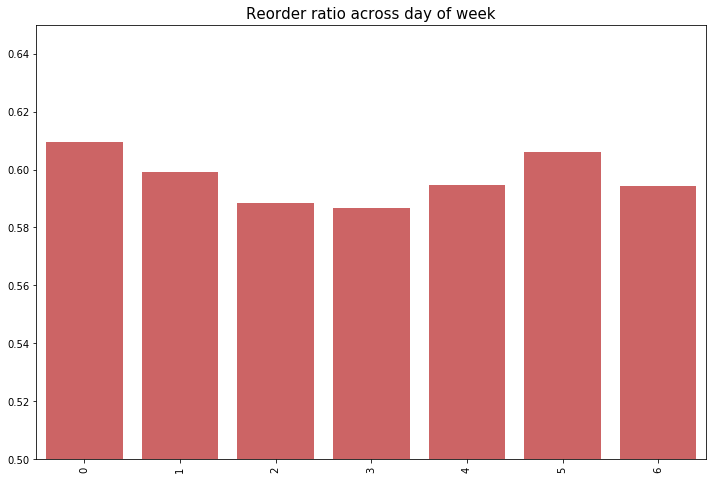

In [0]:
Product_order_train_m= pd.merge(Product_order_train, Orders, on='order_id', how='left')
weekly_reorder_rate = Product_order_train_m.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(weekly_reorder_rate['order_dow'].values, weekly_reorder_rate['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel=('Reorder ratio')
plt.xlabel=('Day of week')
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.65) # previous try without limit gave confusing graph
plt.show()

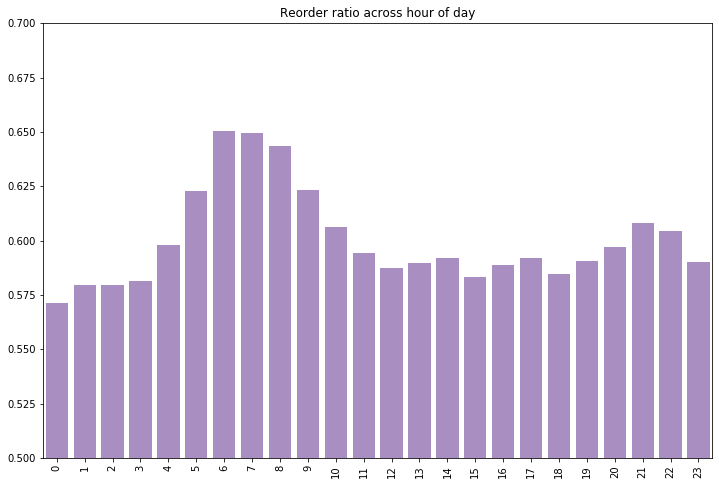

In [0]:
Hourly_order_rate = Product_order_train_m.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(Hourly_order_rate['order_hour_of_day'].values, Hourly_order_rate['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel=('Reorder ratio')
plt.xlabel=('Hour of day')
plt.title("Reorder ratio across hour of day")
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7) # same as above (previous graph was confusing)
plt.show()

As we did previously (the best time of week (week_hour) for reordering

In [0]:
Product_order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
Product_order_train_m.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


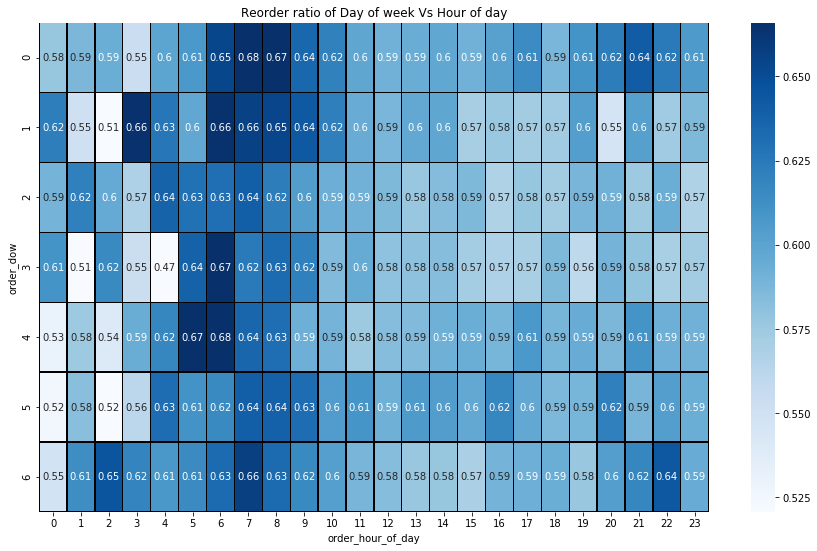

In [0]:
Best_Week_Hour_Reordering = Product_order_train_m.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
Best_Week_Hour_Reordering = Best_Week_Hour_Reordering.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(15,9))
sns.heatmap(Best_Week_Hour_Reordering,annot= True,linecolor= 'black',linewidths=0.3,cmap= 'Blues',mask =False,robust = True)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

### Feature Creation and Modeling

In [0]:
print('loading Data again to convert in dataframe directly,and prefer short names')
priors = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/order_products__prior.csv')

train = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/order_products__train.csv')

orders = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/orders.csv')

products = pd.read_csv('/content/drive/My Drive/instacart-market-basket-analysis/Insta-Market-basket-analysis/products.csv')

print('priors {}: {}'.format(priors.shape, ', '.join(priors.columns)))
print('orders {}: {}'.format(orders.shape, ', '.join(orders.columns)))
print('train {}: {}'.format(train.shape, ', '.join(train.columns)))

###

print('computing product f')
prods = pd.DataFrame()
prods['orders'] = priors.groupby(priors.product_id).size()
prods['reorders'] = priors['reordered'].groupby(priors.product_id).sum()
prods['reorder_rate'] = (prods.reorders / prods.orders)
products = products.join(prods, on='product_id')
products.set_index('product_id', drop=False, inplace=True)
del prods


print('add order info to priors')
orders.set_index('order_id', inplace=True, drop=False)
priors = priors.join(orders, on='order_id', rsuffix='_')
priors.drop('order_id_', inplace=True, axis=1)


loading Data again to convert in dataframe directly,and prefer short names
priors (32434489, 4): order_id, product_id, add_to_cart_order, reordered
orders (3421083, 7): order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order
train (1384617, 4): order_id, product_id, add_to_cart_order, reordered
computing product f
add order info to priors


#### User Features

In [0]:
### user features


print('computing user f')
usr = pd.DataFrame()
usr['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean()
usr['nb_orders'] = orders.groupby('user_id').size()

users = pd.DataFrame()
users['total_items'] = priors.groupby('user_id').size()
users['all_products'] = priors.groupby('user_id')['product_id'].apply(set)
users['total_distinct_items'] = (users.all_products.map(len))

users = users.join(usr)
del usr
users['average_basket'] = (users.total_items / users.nb_orders)

computing user f


### UserXproduct features


In [0]:
### userXproduct features

print('compute userXproduct f - this is long...')
priors['user_product'] = priors.product_id + priors.user_id * 100000

d= dict()
for row in priors.itertuples():
    z = row.user_product
    if z not in d:
        d[z] = (1,
                (row.order_number, row.order_id),
                row.add_to_cart_order)
    else:
        d[z] = (d[z][0] + 1,
                max(d[z][1], (row.order_number, row.order_id)),
                d[z][2] + row.add_to_cart_order)

print('to dataframe (less memory)')
userXproduct = pd.DataFrame.from_dict(d, orient='index')
del d
userXproduct.columns = ['nb_orders', 'last_order_id', 'sum_pos_in_cart']
userXproduct.nb_orders = userXproduct.nb_orders
userXproduct.last_order_id = userXproduct.last_order_id.map(lambda x: x[1])
userXproduct.sum_pos_in_cart = userXproduct.sum_pos_in_cart
print('user X product f', len(userXproduct))

del priors

compute userXproduct f - this is long...
to dataframe (less memory)
user X product f 13307953


### train / test orders ###

In [0]:
print('split orders : train, test')
test_orders = orders[orders.eval_set == 'test']
train_orders = orders[orders.eval_set == 'train']

train.set_index(['order_id', 'product_id'], inplace=True, drop=False)

split orders : train, test


### build list of candidate products to reorder, with features ###

In [0]:


def features(selected_orders, labels_given=False):
    print('build candidate list')
  
    order_list = []
    product_list = []
    labels = []
    i=0
    for row in selected_orders.itertuples():
        i+=1
        if i%10000 == 0: print('order row',i)
        order_id = row.order_id
        user_id = row.user_id
        user_products = users.all_products[user_id]
        product_list += user_products
        order_list += [order_id] * len(user_products)
        if labels_given:
            labels += [(order_id, product) in train.index for product in user_products]
        
    df = pd.DataFrame({'order_id':order_list, 'product_id':product_list})
    labels = np.array(labels)
    del order_list
    del product_list
    
    print('user related features')
    df['user_id'] = df.order_id.map(orders.user_id)
    df['user_total_orders'] = df.user_id.map(users.nb_orders)
    df['user_total_items'] = df.user_id.map(users.total_items)
    df['total_distinct_items'] = df.user_id.map(users.total_distinct_items)
    df['user_average_days_between_orders'] = df.user_id.map(users.average_days_between_orders)
    df['user_average_basket'] =  df.user_id.map(users.average_basket)
    
    print('order related features')
    # df['dow'] = df.order_id.map(orders.order_dow)
    df['order_hour_of_day'] = df.order_id.map(orders.order_hour_of_day)
    df['days_since_prior_order'] = df.order_id.map(orders.days_since_prior_order)
    df['days_since_ratio'] = df.days_since_prior_order / df.user_average_days_between_orders
    
    print('product related features')
    df['aisle_id'] = df.product_id.map(products.aisle_id)
    df['department_id'] = df.product_id.map(products.department_id)
    df['product_orders'] = df.product_id.map(products.orders)
    df['product_reorders'] = df.product_id.map(products.reorders)
    df['product_reorder_rate'] = df.product_id.map(products.reorder_rate)

    print('user_X_product related features')
    df['z'] = df.user_id * 100000 + df.product_id
    df.drop(['user_id'], axis=1, inplace=True)
    df['UP_orders'] = df.z.map(userXproduct.nb_orders)
    df['UP_orders_ratio'] = (df.UP_orders / df.user_total_orders)
    df['UP_last_order_id'] = df.z.map(userXproduct.last_order_id)
    df['UP_average_pos_in_cart'] = (df.z.map(userXproduct.sum_pos_in_cart) / df.UP_orders)
    df['UP_reorder_rate'] = (df.UP_orders / df.user_total_orders)
    df['UP_orders_since_last'] = df.user_total_orders - df.UP_last_order_id.map(orders.order_number)
    df['UP_delta_hour_vs_last'] = abs(df.order_hour_of_day - df.UP_last_order_id.map(orders.order_hour_of_day)).map(lambda x: min(x, 24-x))
    #df['UP_same_dow_as_last_order'] = df.UP_last_order_id.map(orders.order_dow) == \
    #                                              df.order_id.map(orders.order_dow)

    df.drop(['UP_last_order_id', 'z'], axis=1, inplace=True)
    print(df.dtypes)
    print(df.memory_usage())
    return (df, labels)
print('process complete')

df_train, labels = features(train_orders, labels_given=True)

process complete
build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
order row 80000
order row 90000
order row 100000
order row 110000
order row 120000
order row 130000
user related features
order related features
product related features
user_X_product related features
order_id                              int64
product_id                            int64
user_total_orders                     int64
user_total_items                      int64
total_distinct_items                  int64
user_average_days_between_orders    float64
user_average_basket                 float64
order_hour_of_day                     int64
days_since_prior_order              float64
days_since_ratio                    float64
aisle_id                              int64
department_id                         int64
product_orders                      float64
product_reorders                    float64
product_reorder_rate            

In [0]:
f_to_use = ['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last'] # 'dow', 'UP_same_dow_as_last_order'

### LGB
### lgb ( Light gbm) is low gradient boosting algorithm which is modified decision tree model, but it works on leaf based progress instead of level based common algorithm. It mostly works same as xgboost but it has more accuracy due to reducing loss function speedily, for more info please visit this page[https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/] 

In [0]:
import lightgbm as lgb

print('formating for lgb')
d_train = lgb.Dataset(df_train[f_to_use],
                      label=labels,
                      categorical_feature=['aisle_id', 'department_id'])  # , 'order_hour_of_day', 'dow'
del df_train

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 96,
    'max_depth': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5
}
ROUNDS = 100

print('light GBM train :-)')
bst = lgb.train(params, d_train, ROUNDS)
# lgb.plot_importance(bst, figsize=(9,20))
del d_train


formating for lgb
light GBM train :-)


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


### build candidates list for test

In [0]:

df_test, _ = features(test_orders)

print('light GBM predict')
preds = bst.predict(df_test[f_to_use])

df_test['pred'] = preds

TRESHOLD = 0.22  # guess, should be tuned with crossval on a subset of train data

d = dict()
for row in df_test.itertuples():
    if row.pred > TRESHOLD:
        try:
            d[row.order_id] += ' ' + str(row.product_id)+','
        except:
            d[row.order_id] = str(row.product_id)+ ','

for order in test_orders.order_id:
    if order not in d:
        d[order] = 'None'


build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
user related features
order related features
product related features
user_X_product related features
order_id                              int64
product_id                            int64
user_total_orders                     int64
user_total_items                      int64
total_distinct_items                  int64
user_average_days_between_orders    float64
user_average_basket                 float64
order_hour_of_day                     int64
days_since_prior_order              float64
days_since_ratio                    float64
aisle_id                              int64
department_id                         int64
product_orders                      float64
product_reorders                    float64
product_reorder_rate                float64
UP_orders                             int64
UP_orders_ratio                     float64
UP_average_pos_in

### Format prediction File

In [0]:
sub = pd.DataFrame.from_dict(d, orient='index')

sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.to_csv('Prediction.csv', index=False)